In [1]:
%matplotlib inline

import tensorflow as tf
import cv2 as cv
import os
import matplotlib.pyplot as plt
from PIL import Image
from ISR.models import RDN

In [2]:
def health_check():
    os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
    gpus = tf.config.list_physical_devices("GPU")
    print('Found {cnt} GPUs available.'.format(cnt=len(gpus)))
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    print('All GPU set to allow memory growth.')

In [3]:
def read_video_frames(filename='sample.mp4', max_frame=100):
    vidcap = cv.VideoCapture(os.path.join('.', 'data', filename))
    success, frame, frames = True, None, []
    while success and len(frames) < max_frame:
        success, frame = vidcap.read()
        frames.append(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
    vidcap.release()
    print('Found {frame_cnt} frames in the sample video.'.format(frame_cnt=len(frames)))
    return frames

In [4]:
health_check()

Found 0 GPUs available.
All GPU set to allow memory growth.


In [5]:
frames = read_video_frames()

Found 100 frames in the sample video.


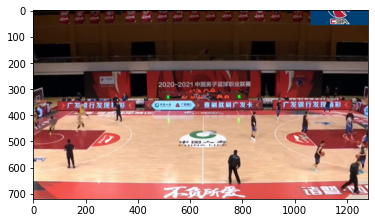

In [6]:

sample_frame = frames[-1]
plt.imshow(sample_frame)
Image.fromarray(sample_frame).save(os.path.join('sample_frame.png'))

In [9]:
rdn = RDN(weights='noise-cancel')

66076672/66071288 [==============================] - 11s 0us/step


In [10]:
sr_frame = rdn.predict(sample_frame)

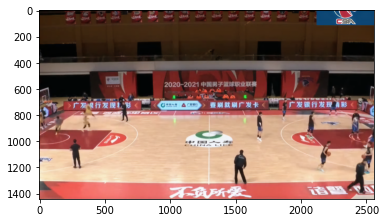

In [11]:
plt.imshow(sr_frame)
Image.fromarray(sr_frame).save(os.path.join('sample_sr_frame_noise_cancel.png'))